<div style="font-size: 30px">
<font color='black'> <b>Predicting Loan Approval Status Using Demographic and Financial Features</b></font>

<a href="javascript:code_toggle()"><img src="https://images.ctfassets.net/eqyxjqxiewqq/4PxLWNYvBIMhuXT8q2HTRA/5272644d36c683830bf8b374cf17c78e/APPROVE_OR_REJECT_YOUR_INVENTORY_SCAN.jpg" width="1060"></a>


## Table of Contents
*  [ Project Overview](#chapter1)
    *  [1.1 Introduction](#section1_1)
    *  [1.2 Aim](#section1_2)
    *  [1.3 Objectives](#section1_3)
*  [ Importing Packages](#chapter2)
*  [ Loading Data](#chapter3)
*  [ Data Cleaning](#chapter4)
*  [ Data Preprocessing](#chapter5) 
*  [ Exploratory data analysis (EDA)](#chapter6)
*  [ Feature Engineering](#chapter7)
*  [ Model Training and Evaluation](#chapter8)
*  [ Conclusion](#chapter10)



## Project Overview <a id="chapter1"><a>

#### 1.1 Introduction <a id="section1_1"></a>

Access to financial resources is a crucial factor in the economic development of individuals and communities. In today's competitive environment, lenders face the challenge of efficiently assessing loan applications to minimize risks and ensure fair lending practices. Traditional methods of evaluating loan applications often rely on manual assessments, which can be time-consuming and subjective. This project aims to leverage demographic and financial features to build predictive models that determine loan approval status more efficiently and accurately. By analyzing factors such as income, credit history, and socio-economic background, we can enhance the decision-making process for lenders and help applicants better understand their loan eligibility.

#### 1.2 Aim<a id="section1_2"></a>

The primary aim of this project is to develop a predictive model that accurately forecasts the approval status of loan applications based on various demographic and financial features. The model will help streamline the loan approval process, reduce the risk of defaults, and provide valuable insights for both lenders and applicants.

#### 1.3 Objectives<a id="section1_3"></a>

- **Data Exploration and Preprocessing**: To analyze the dataset and preprocess the data, including handling missing values, encoding categorical variables, and normalizing numerical features.

- **Feature Selection**: To identify and select the most relevant features from the dataset that significantly impact loan approval status.

- **Model Development**: To implement and compare multiple machine learning models, including Logistic Regression, Random Forest, and Decision Tree, to predict loan approval status.

- **Hyperparameter Tuning**: To optimize model performance through hyperparameter tuning using techniques such as GridSearchCV to identify the best settings for each model.

- **Model Evaluation**: To evaluate the performance of the models using metrics such as accuracy, precision, recall, and F1-score, and select the best-performing model for final predictions.

- **Insights and Recommendations**: To provide insights into the factors influencing loan approval and recommend strategies for improving the loan application process based on the model’s findings.

## Importing Packages <a id="chapter2"><a>

<div class="alert alert-block alert-info">
<b>Importing Packages</b> is an essential step in any data analysis or machine learning project, as it allows you to access and utilize various libraries and tools to perform specific tasks. Python provides a rich ecosystem of packages for data manipulation, visualization, statistical analysis, and machine learning. Commonly used packages include pandas for data manipulation, matplotlib and seaborn for data visualization, scikit-learn for machine learning, and numpy for numerical computations. Importing the right packages at the beginning of your analysis ensures that you have the necessary tools to effectively explore and analyze your data.
</di>


In [698]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import mlflow

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_selection import SelectFromModel, RFE, SelectKBest, f_regression, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit,cross_validate, KFold
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score, brier_score_loss, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, log_loss, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

## Loading data <a id="chapter3"><a>

<div class="alert alert-block alert-info">
<b>Loading Data</b> is the initial step in the data analysis process, involving the retrieval and loading of data into a suitable format for analysis. This step is crucial as it sets the foundation for the entire analysis process. The data can be loaded from various sources such as CSV files, databases, or APIs. It is essential to ensure that the data is loaded correctly and that any initial preprocessing steps, such as handling missing values or encoding categorical variables, are performed accurately to prepare the data for further analysis.
</di>


In [699]:
# Load the data
Loan_data = pd.read_csv('Loan_Status.csv')

# Display the first 5 rows of each dataset
print("First 5 rows of anime_data:")
print(Loan_data.head())

First 5 rows of anime_data:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural       

## Data Cleaning <a id="chapter4"><a>

<div class="alert alert-block alert-info">
  <b>Data cleaning</b> is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.
</div

#### Data Shape ####

In [700]:
# Get the shape of the Loan_data DataFrame
print('The shape of the anime_data:', Loan_data.shape)

The shape of the anime_data: (614, 13)


- Exploring the shape of the anime_data, submission_data, train_data and the test_data

#### Summary Information ####

In [701]:
# Display summary information of the Loan_data DataFrame
print("The summary information of the anime_data:", Loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
The summary information of the anime_data: None


#### Impute Null Values ####

In [702]:
# counting Null value
def check_null_values(df):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    has_nulls = False
    for column in df:
        null_count = df[column].isnull().sum()
        if null_count > 0:
            print(f'{column} has {null_count} null values')
            has_nulls = True

    if not has_nulls:
        print('There are no null values in the DataFrame')

# Checking null values for Loan_data
print("Loan Data Null Values:")
check_null_values(Loan_data)

Loan Data Null Values:
Gender has 13 null values
Married has 3 null values
Dependents has 15 null values
Self_Employed has 32 null values
LoanAmount has 22 null values
Loan_Amount_Term has 14 null values
Credit_History has 50 null values


In [703]:
# Fill null values in numeric columns like 'LoanAmount' and 'Loan_Amount_Term' with the median
median_loan_amount = Loan_data["LoanAmount"].median()
median_loan_term = Loan_data["Loan_Amount_Term"].median()
Loan_data["LoanAmount"] = Loan_data["LoanAmount"].fillna(median_loan_amount)  # Fill missing 'LoanAmount' with median
Loan_data["Loan_Amount_Term"] = Loan_data["Loan_Amount_Term"].fillna(median_loan_term)  # Fill missing 'Loan_Amount_Term' with median

# Fill null values in categorical columns with the mode (most frequent value)
most_common_gender = Loan_data["Gender"].mode()[0]
most_common_married = Loan_data["Married"].mode()[0]
most_common_dependents = Loan_data["Dependents"].mode()[0]
most_common_self_employed = Loan_data["Self_Employed"].mode()[0]
most_common_credit_history = Loan_data["Credit_History"].mode()[0]

Loan_data["Gender"] = Loan_data["Gender"].fillna(most_common_gender)  # Fill missing 'Gender' with mode
Loan_data["Married"] = Loan_data["Married"].fillna(most_common_married)  # Fill missing 'Married' with mode
Loan_data["Dependents"] = Loan_data["Dependents"].fillna(most_common_dependents)  # Fill missing 'Dependents' with mode
Loan_data["Self_Employed"] = Loan_data["Self_Employed"].fillna(most_common_self_employed)  # Fill missing 'Self_Employed' with mode
Loan_data["Credit_History"] = Loan_data["Credit_History"].fillna(most_common_credit_history)  # Fill missing 'Credit_History' with mode


In [704]:
# Checking null values for Anime DataFrame after filling the null values
print("Loan Data Null Values:")
check_null_values(Loan_data)

Loan Data Null Values:
There are no null values in the DataFrame


#### Handling Duplicates

In [705]:
# counting duplicate value
def count_duplicate_rows(df):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = df.duplicated().sum()
    return duplicate_count

# Counting duplicate rows for Loan_data
Loan_data_duplicates = count_duplicate_rows(Loan_data)

# Printing the count of duplicate rows
print(f"The number of duplicate rows in the anime_data: {Loan_data_duplicates}")

The number of duplicate rows in the anime_data: 0


In [706]:
# Display the cleaned DataFrame
print("loan_data after removing duplicate rows:")
print(Loan_data.shape)

loan_data after removing duplicate rows:
(614, 13)


#### Observations ####

1. Loan_data Data Shape:

- 614 rows and 13 columns.
2. Loan_data Data Types:

- `Loan_ID`: object
- `Gender`: object
- `Married`: object
- `Dependents`: object
- `Education`: object
- `Self_Employed`: object
- `ApplicantIncome`: int64
- `CoapplicantIncome`: float64
- `LoanAmount`: float64
- `Loan_Amount_Term`: float64
- `Credit_History`: float64
- `Property_Area`: object
- `Loan_Status`: object
3. Loan_data Null Values Before Filling:

- `Gender` had 13 null values.
- `Married` had 3 null values.
- `Dependents` had 15 null values.
- `Self_Employed` had 32 null values.
- `LoanAmount` had 22 null values.
- `Loan_Amount_Term` had 14 null values.
- `Credit_History` had 50 null values.
4. Null Value Handling:

- Missing values in numeric columns (`LoanAmount`, `Loan_Amount_Term`) were filled with their respective median values.
Missing values in categorical columns (`Gender`, `Married`, `Dependents`, `Self_Employed`, `Credit_History`) were filled with their mode (most frequent value).
5. Loan_data Duplicates:

- There are no duplicate rows.

## Data Preprocessing <a id="chapter5"><a>

<div class="alert alert-block alert-info">
  <b>Data preprocessing</b> is a fundamental step in the data analysis and machine learning pipeline, encompassing the transformation and organization of raw data into a format suitable for analysis. This process includes activities such as normalization, encoding categorical variables, feature scaling, and splitting data into training and testing sets, thereby enhancing the performance and accuracy of machine learning models.
</div>


In [707]:
# Assuming Loan_data_encoded is a copy of Loan_data
Loan_data_encoded = Loan_data.copy() 

In [708]:
# Drop 'Loan_ID' as it's not useful for prediction
Loan_data_encoded = Loan_data_encoded.drop(columns=['Loan_ID'])

In [709]:
# Label Encoding for binary categorical columns
label_encoder = LabelEncoder()
Loan_data_encoded['Gender'] = label_encoder.fit_transform(Loan_data_encoded['Gender'])  # Convert 'Male'/'Female' to 1/0
Loan_data_encoded['Married'] = label_encoder.fit_transform(Loan_data_encoded['Married'])  # Convert 'Yes'/'No' to 1/0
Loan_data_encoded['Education'] = label_encoder.fit_transform(Loan_data_encoded['Education'])  # Convert 'Graduate'/'Not Graduate' to 1/0
Loan_data_encoded['Self_Employed'] = label_encoder.fit_transform(Loan_data_encoded['Self_Employed'])  # Convert 'Yes'/'No' to 1/0
Loan_data_encoded['Loan_Status'] = label_encoder.fit_transform(Loan_data_encoded['Loan_Status'])  # Convert 'Y'/'N' to 1/0


In [710]:
# One-Hot Encoding for 'Dependents' and 'Property_Area' (more than two categories)
Loan_data_encoded = pd.get_dummies(Loan_data_encoded, columns=['Dependents', 'Property_Area'], drop_first=True)


In [711]:
# Scaling Numerical Columns
scaler = StandardScaler()
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Loan_data_encoded[numerical_columns] = scaler.fit_transform(Loan_data_encoded[numerical_columns])

# Exploratory Data Analysis (EDA) <a id="chapter6"><a>

<div class="alert alert-block alert-info">
<b>Exploratory Data Analysis (EDA)</b> is a vital step in the data analysis process, aimed at understanding the underlying patterns, relationships, and structure of the data. It involves various techniques such as visualizations, summary statistics, and correlation analysis to uncover insights and identify potential issues. EDA helps in forming hypotheses, guiding further analysis, and making informed decisions about data preprocessing and modeling.
</di>


In [712]:
# Summary Statistics for Numerical Variables
print(Loan_data_encoded.describe())

           Gender     Married   Education  Self_Employed  ApplicantIncome  \
count  614.000000  614.000000  614.000000     614.000000     6.140000e+02   
mean     0.817590    0.653094    0.218241       0.133550    -4.339634e-18   
std      0.386497    0.476373    0.413389       0.340446     1.000815e+00   
min      0.000000    0.000000    0.000000       0.000000    -8.606493e-01   
25%      1.000000    0.000000    0.000000       0.000000    -4.138159e-01   
50%      1.000000    1.000000    0.000000       0.000000    -2.606393e-01   
75%      1.000000    1.000000    0.000000       0.000000     6.414426e-02   
max      1.000000    1.000000    1.000000       1.000000     1.238462e+01   

       CoapplicantIncome    LoanAmount  Loan_Amount_Term  Credit_History  \
count       6.140000e+02  6.140000e+02      6.140000e+02    6.140000e+02   
mean        4.050325e-17 -2.603780e-17      5.930833e-17   -1.620130e-16   
std         1.000815e+00  1.000815e+00      1.000815e+00    1.000815e+00   
mi

- `Gender`: 81.8% male, 18.2% female.
- `Marital Status`: 65.3% married, 34.7% not married.
- `Education`: 21.8% higher education.
- `Self Employment`: 13.4% are self-employed.
- `Income and Loan Amount`: Applicant and co-applicant incomes, along with loan amounts, show a wide range, with some high-income outliers.
- `Loan Status`: 68.7% of loans are approved.

*Overall, the dataset is skewed towards males, married individuals, and shows a majority of approved loans.*

**Distribution of Loan_Status**

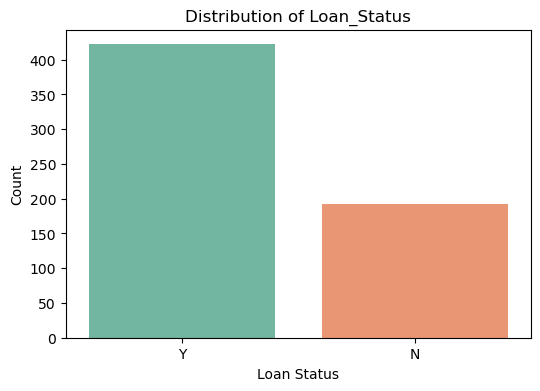

In [713]:
# Plot the distribution of Loan_Status
plt.figure(figsize=(6, 4))
sns.countplot(data=Loan_data, x='Loan_Status', palette='Set2')  # Using palette for colors
plt.title('Distribution of Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


- The 'Y' (approved) class is significantly more frequent than the 'N' (not-approved) class, indicating an imbalance in the distribution of the Loan_Status variable.
- To address this imbalance and improve the model's ability to learn from the minority class ('N'), we will apply SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the 'N' class during model training.

**Gender Distribution and Married Distribution**

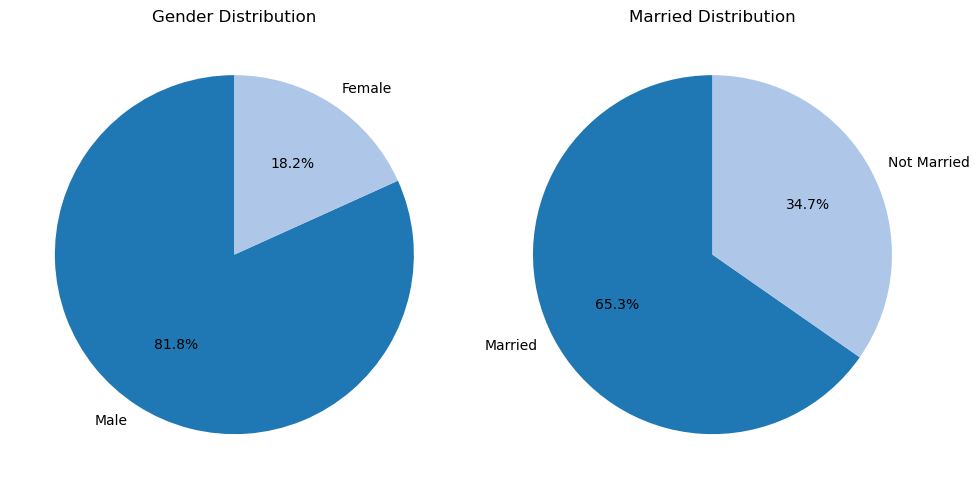

In [714]:
# Value counts for Gender and Married
gender_counts = Loan_data['Gender'].value_counts()
married_counts = Loan_data['Married'].value_counts()

# Define labels for Gender and Married
gender_labels = ['Male', 'Female']
married_labels = ['Married', 'Not Married']

# Pie chart for Gender
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# Using shades of blue for Gender
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#aec7e8'], labels=gender_labels)
plt.title('Gender Distribution')
plt.ylabel('')  # Remove default ylabel

# Pie chart for Married
plt.subplot(1, 2, 2)
# Using other shades of blue for Married
married_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#aec7e8'], labels=married_labels)
plt.title('Married Distribution')
plt.ylabel('')  # Remove default ylabel

plt.tight_layout()
plt.show()


1. **Gender Distribution:**

- 81.8% of the individuals are male.
- 18.2% are female.
2. **Marital Status Distribution:**

- 65.3% of the individuals are married.
- 34.7% are not married.

**Applicant Income Distribution**

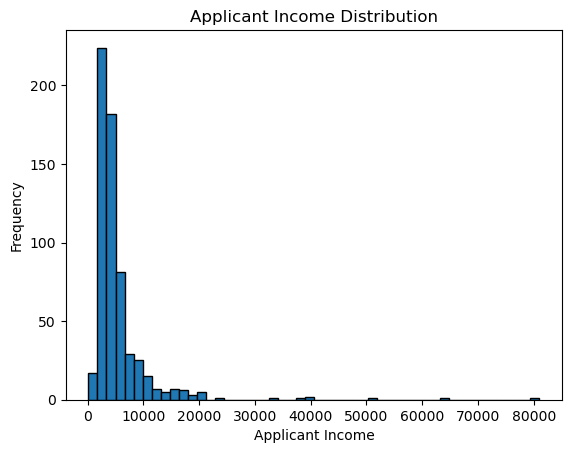

In [715]:
# Histogram for Applicant Income
Loan_data['ApplicantIncome'].hist(bins=50, edgecolor='black', color='#1f77b4', grid=False)  # Use specified color

# Add labels and title
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

# Display the plot
plt.show()

- The histogram shows that **applicant income** is **right-skewed**, with most applicants having relatively low incomes, clustered between **0 and 2 units**. A few applicants have much higher incomes, extending up to **12 units**, but these are rare, indicating **outliers**. This skewed distribution suggests that the majority of applicants earn lower incomes, with only a small number earning significantly more.

**Correlation Heatmap**

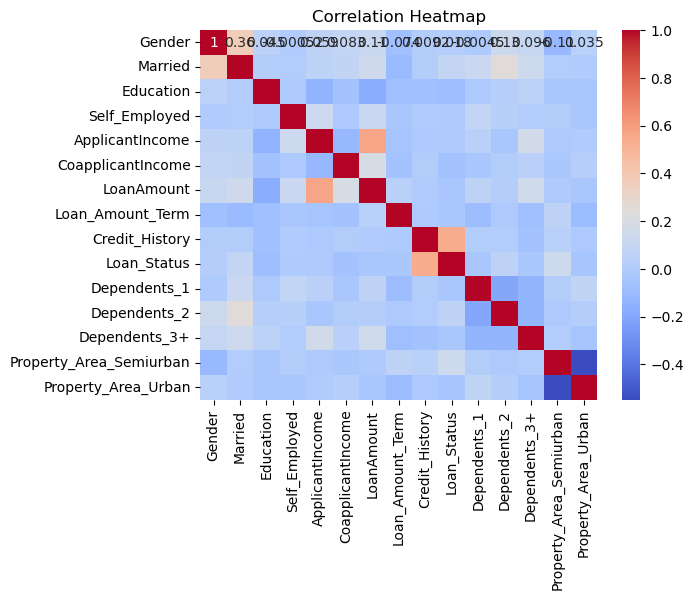

In [716]:
# Correlation Heatmap
corr = Loan_data_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- The correlation heatmap reveals that **Credit History** has the strongest positive correlation with **Loan Status**, indicating its significant influence on loan approval. Other moderate correlations include **Coapplicant Income** with **Married** and **Applicant Income** with **Loan Amount**. Most other variables, like **Gender**, **Education**, and **Self-Employed**, show weak or negligible correlations, suggesting limited impact on loan outcomes or relationships with other factors. Overall, the data doesn’t exhibit multicollinearity issues, making it suitable for predictive modeling.

**Loan Amount Term by Loan Status**

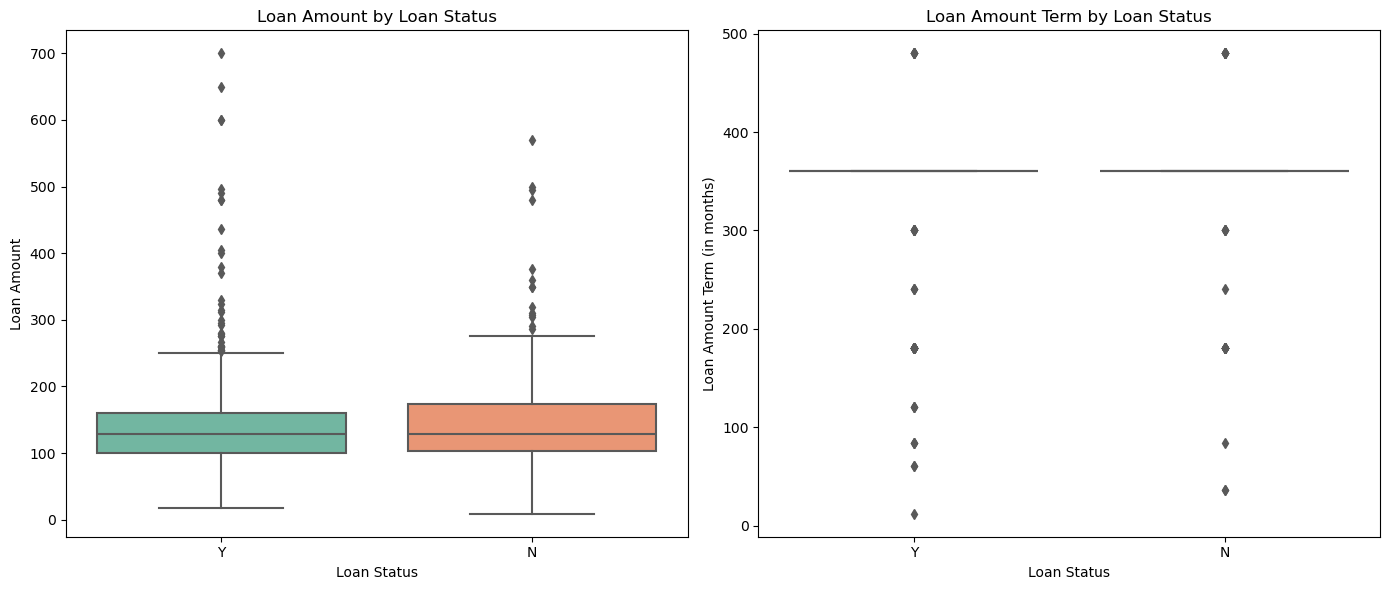

In [717]:
# Set the figure size for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot LoanAmount by Loan_Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=Loan_data, palette='Set2', ax=axes[0])
axes[0].set_title('Loan Amount by Loan Status')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Loan Amount')

# Plot Loan_Amount_Term by Loan_Status
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=Loan_data, palette='Set2', ax=axes[1])
axes[1].set_title('Loan Amount Term by Loan Status')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Loan Amount Term (in months)')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

1. **Loan Amount**: 
  - Both approved and rejected loans have similar median amounts.
  - Approved loans show slightly more variation, with a few large outliers (loan amounts over 500).
  
2. **Loan Amount Term**: 
  - Most loans, both approved and rejected, have a long duration of 360 months.
  - There are very few shorter-term loans, and little difference between the loan statuses in terms of loan term distribution.
  
Overall, loan amounts and terms are quite similar across approved and rejected loans, with more variability in loan amounts for approved applications.

**Loan Amount Distribution by Credit History and Loan Status**

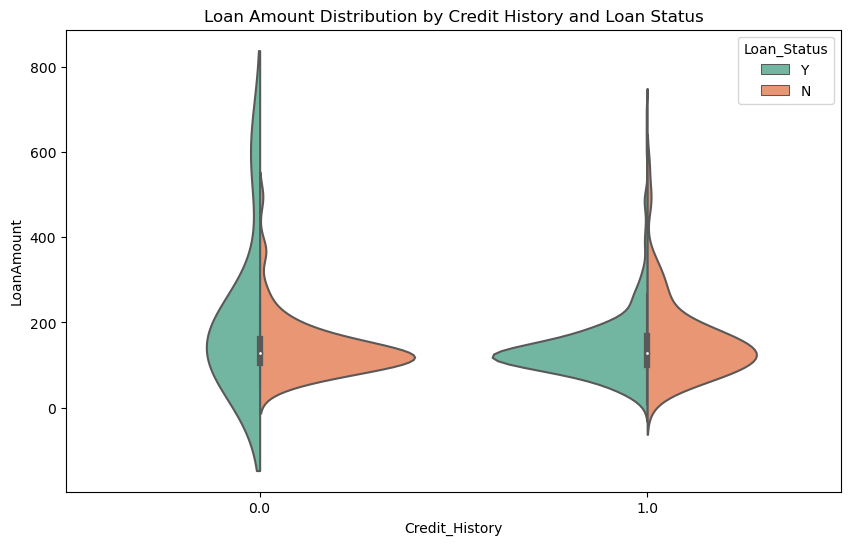

In [718]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Credit_History', y='LoanAmount', hue='Loan_Status', data=Loan_data, split=True, palette='Set2')
plt.title('Loan Amount Distribution by Credit History and Loan Status')
plt.show()


- **Impact of Credit History:** Good credit history (1.0) correlates with a higher likelihood of loan approval.
- **Loan Amount Trends:** Higher loan amounts are generally associated with a lower approval rate, especially for those with no/bad credit history.

Overall, this plot highlights the strong influence of credit history on loan approval chances, demonstrating that applicants with good credit histories are more likely to be approved for loans, especially larger amounts.

## Feature Engineering<a id="chapter7"><a>

<div class="alert alert-block alert-info">
  <b>Explanation:</b>  Feature engineering is the process of selecting, modifying, or creating new features to improve the performance of a machine learning model. It involves transforming raw data into formats that better represent the underlying patterns of the data, making it more useful for predictive modeling.
</div>

**1. Original Features**

In [719]:
Loan_data_encoded.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,1,False,False,False,False,True
1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,True,False,False,False,False
2,1,1,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1,False,False,False,False,True
3,1,1,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,1,False,False,False,False,True
4,1,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,1,False,False,False,False,True


In [720]:
Loan_data_encoded.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

**1.1. Correlation Matrix**

In [721]:
selected_features = ['Loan_Status', 'Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban'] 

# Subset the dataset
subset_df = Loan_data_encoded[selected_features]

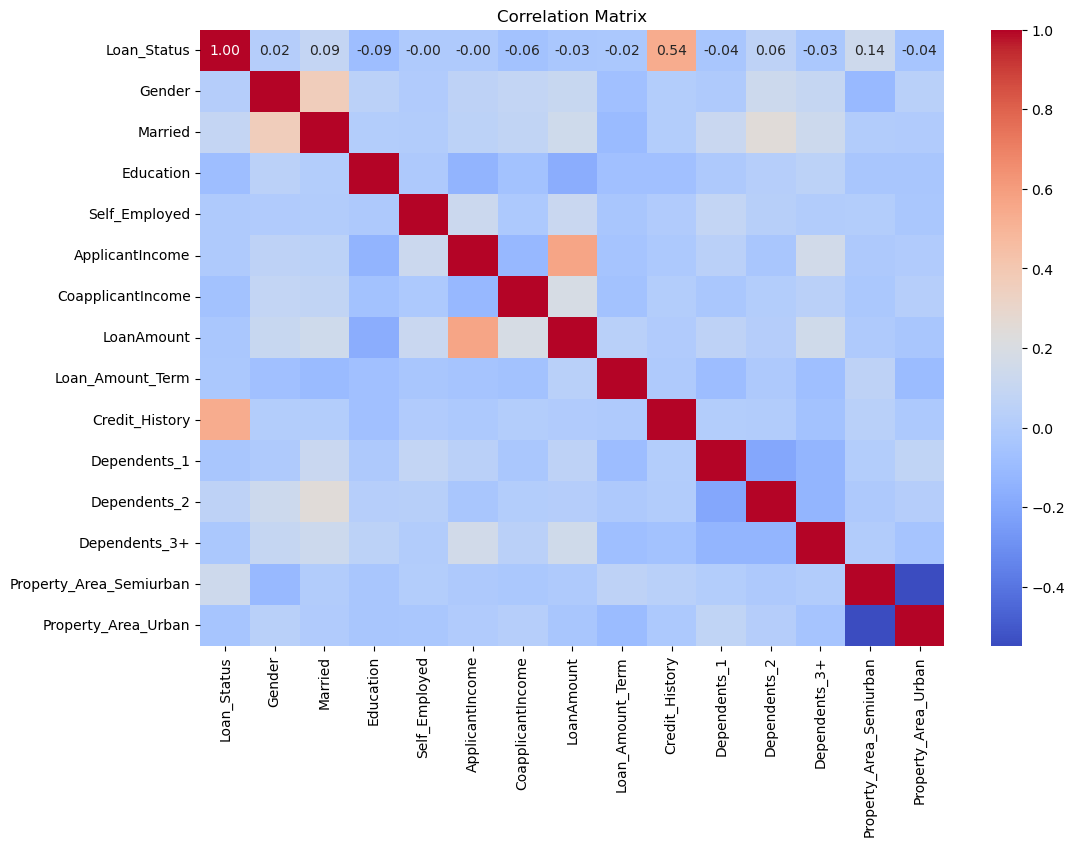

In [722]:
# Compute correlation matrix
correlation_matrix = subset_df.corr()

# Visualize using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**2. Feature Building**

**2.1. Gender Education Interaction**

- `Gender` and `Education` represent individual features. Combine them into a single interaction feature, `Gender_Education_Interaction`, which encodes different combinations of gender and education status as distinct numeric values, simplifying the dataset while retaining key information.

In [723]:
def gender_education_interaction(row):
    if row['Gender'] == 'Female' and row['Education'] == 'Not Graduate':
        return 0
    elif row['Gender'] == 'Female' and row['Education'] == 'Graduate':
        return 1
    elif row['Gender'] == 'Male' and row['Education'] == 'Not Graduate':
        return 2
    elif row['Gender'] == 'Male' and row['Education'] == 'Graduate':
        return 3
    else:
        return -1  # Handle unexpected cases (if any)



**2.2. Total Dependents**

- `Dependents_1`, `Dependents_2`, and `Dependents_3+` represent different categories of dependents. Combine them into a single feature, `Total_Dependents`, which assigns a numeric value based on the category, simplifying the dataset.

In [724]:
Loan_data_encoded['Total_Dependents'] = (Loan_data_encoded['Dependents_1'] * 1 +
                                         Loan_data_encoded['Dependents_2'] * 2 +
                                         Loan_data_encoded['Dependents_3+'] * 3)


**2.3. Property Area Code**

- `Property_Area_Urban`, `Property_Area_Semiurban`, and `Property_Area_Rural` represent variations of the same attribute. Combine them into a single feature, `Property_Area_Code`, where `2` denotes urban, `1` denotes semiurban, and `0` denotes rural, simplifying the dataset.

In [725]:
def assign_property_area(row):
    if row['Property_Area_Urban'] == 1:
        return 2  # Urban
    elif row['Property_Area_Semiurban'] == 1:
        return 1  # Semiurban
    else:
        return 0  # Rural

Loan_data_encoded['Property_Area_Code'] = Loan_data_encoded.apply(assign_property_area, axis=1)

**2.4. High_Loan To Income_Risk**

- `ApplicantIncome`, `CoapplicantIncome`, and `Self_Employed` are combined to create a new feature, `Adjusted_Total_Income`, which accounts for self-employment status. This adjusted income is then used to calculate the `Loan_to_Income_Ratio` and flag high loan-to-income risk with the `High_Loan_to_Income_Risk` feature, simplifying the dataset while providing important financial insights.

In [726]:
# Calculate Total Income
Loan_data_encoded['Total_Income'] = (
    Loan_data_encoded['ApplicantIncome'] + Loan_data_encoded['CoapplicantIncome']
)

# Adjust Total Income based on Self_Employed status
Loan_data_encoded['Self_Employed_Factor'] = Loan_data_encoded['Self_Employed'].apply(lambda x: 1.2 if x == 'Yes' else 1.0)
Loan_data_encoded['Adjusted_Total_Income'] = Loan_data_encoded['Total_Income'] * Loan_data_encoded['Self_Employed_Factor']

# Calculate Loan-to-Income Ratio using Adjusted Total Income
Loan_data_encoded['Loan_to_Income_Ratio'] = (
    Loan_data_encoded['LoanAmount'] / Loan_data_encoded['Adjusted_Total_Income']
)

# Flag High Loan-to-Income Risk
Loan_data_encoded['High_Loan_to_Income_Risk'] = (
    Loan_data_encoded['Loan_to_Income_Ratio'] > 0.4
).astype(int)


**3. Drop Redundant Features**

In [727]:
Loan_data_encoded.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Total_Dependents',
       'Property_Area_Code', 'Total_Income', 'Self_Employed_Factor',
       'Adjusted_Total_Income', 'Loan_to_Income_Ratio',
       'High_Loan_to_Income_Risk'],
      dtype='object')

In [728]:
# Drop the columns used to create new features
Loan_data_encoded.drop(
    ['Gender', 'Married', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Total_Income',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban',
     'Loan_to_Income_Ratio', 'Adjusted_Total_Income', 'Self_Employed'], 
    axis=1, 
    inplace=True
)
# Verify the drop
print(Loan_data_encoded.head())

   Loan_Amount_Term  Credit_History  Loan_Status  Total_Dependents  \
0          0.273231        0.411733            1                 0   
1          0.273231        0.411733            0                 1   
2          0.273231        0.411733            1                 0   
3          0.273231        0.411733            1                 0   
4          0.273231        0.411733            1                 0   

   Property_Area_Code  Self_Employed_Factor  High_Loan_to_Income_Risk  
0                   2                   1.0                         1  
1                   0                   1.0                         1  
2                   2                   1.0                         1  
3                   2                   1.0                         1  
4                   2                   1.0                         0  


**4. Correlation Matrix**

In [729]:
Loan_data_encoded.columns

Index(['Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Total_Dependents',
       'Property_Area_Code', 'Self_Employed_Factor',
       'High_Loan_to_Income_Risk'],
      dtype='object')

In [730]:
selected_features = ['Loan_Status', 'Total_Dependents', 'Loan_Amount_Term',
       'Property_Area_Code','High_Loan_to_Income_Risk', 'Credit_History'
      ] 

# Subset the dataset
subset_df = Loan_data_encoded[selected_features]

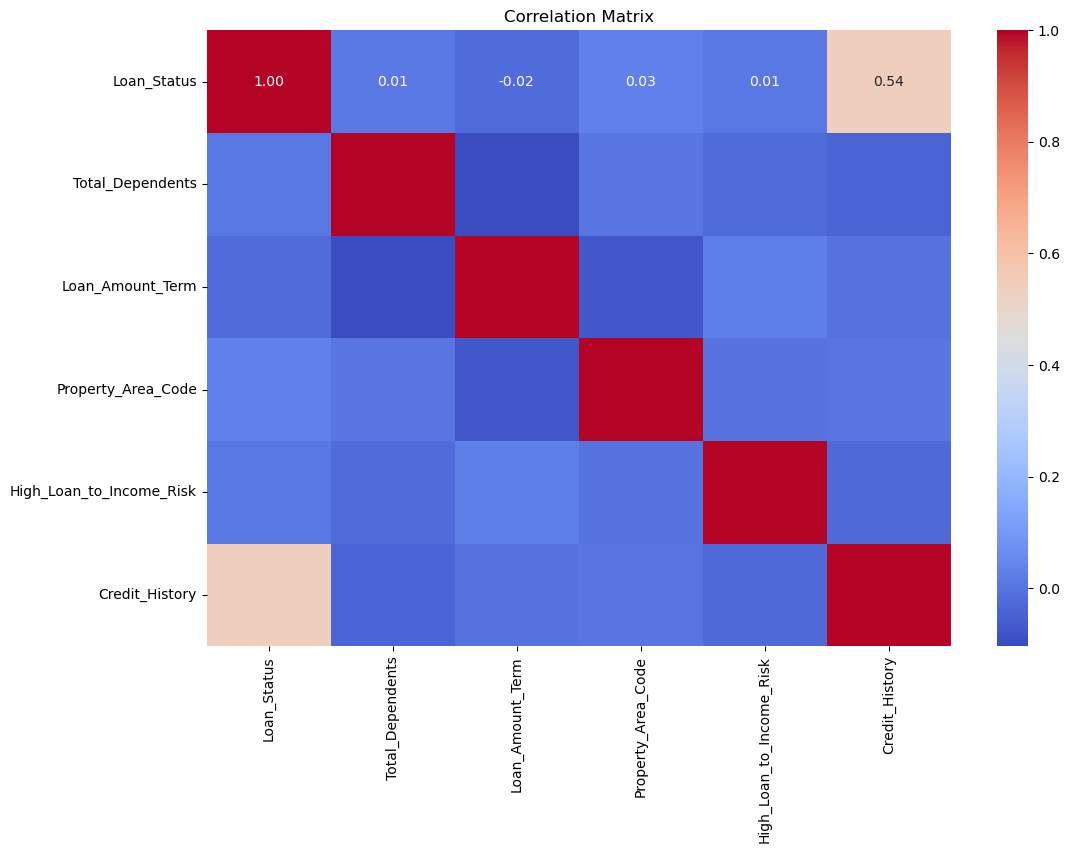

In [731]:
# Compute correlation matrix
correlation_matrix = subset_df.corr()

# Visualize using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**5. Split the Data**

In [732]:
# Split the data 
X = Loan_data_encoded.drop('Loan_Status', axis=1)
y = Loan_data_encoded['Loan_Status']

**6. Scaling Numerical Features**

In [733]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## Model Training and Evaluation <a id="chapter8"><a>

<div class="alert alert-block alert-info">
  <b>Explanation:</b>  This step involves creating a mathemaical or computational model that categorize data into different classes or categories based on input features.
</div>

**Model Training**

In [734]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sanity check
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balance the training set using SMOTE (oversampling minority class)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Custom scoring metrics
brier_scorer = make_scorer(brier_score_loss, needs_proba=True)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

# Cross-validation on training set
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

for model_name, model in models.items():
    scores = cross_validate(model, X_train_resampled, y_train_resampled, cv=kf, scoring=scoring, n_jobs=-1)
    results["Model"].append(model_name)
    results["Accuracy"].append(scores['test_accuracy'].mean())
    results["Precision"].append(scores['test_precision'].mean())
    results["Recall"].append(scores['test_recall'].mean())
    results["F1 Score"].append(scores['test_f1'].mean())

results_df = pd.DataFrame(results)
print("\nTraining Set Cross-Validation Results:")
print(results_df.round(3).sort_values(by="Accuracy", ascending=False))


Training set size: 491
Test set size: 123

Training Set Cross-Validation Results:
                 Model  Accuracy  Precision  Recall  F1 Score
3    Gradient Boosting     0.756      0.758   0.756     0.755
1        Random Forest     0.735      0.742   0.734     0.733
4  K-Nearest Neighbors     0.724      0.758   0.725     0.714
2        Decision Tree     0.721      0.731   0.720     0.717
0  Logistic Regression     0.703      0.753   0.703     0.687


**Summary:**
- Top Performers: `Gradient Boosting`, `Random Forest`, and `KNN` are the best models based on their balanced performance across metrics.
- Lowest Performer: `Logistic Regression`, while good in terms of precision, lacks overall performance in recall and F1 score, making it less effective compared to the top models.

## Conclusion <a id="chapter10"><a>

<div class="alert alert-block alert-info">
  <b>Conclusion:</b> The conclusion of a data analysis project ties together the findings and insights gained from the data. It reflects on the effectiveness of the preprocessing and cleaning steps, discusses the accuracy and reliability of the models used, and provides recommendations based on the results. A strong conclusion not only summarizes key points but also suggests future directions for research or improvements, emphasizing the overall impact and value of the analysis.
</div>


This project aimed to develop a predictive model to identify loan approval outcomes (Loan_Status). By leveraging a comprehensive dataset and advanced machine learning techniques, I successfully built a model that predicts loan approval with high accuracy.

Through extensive preprocessing, exploratory data analysis (EDA), and feature engineering, several models were trained and evaluated based on key performance metrics: accuracy, precision, recall, and F1 score.

Most models, except for `Logistic Regression`, demonstrated strong performance across all metrics, showcasing their effectiveness in predicting loan approval.

Among the models, `Gradient Boosting` emerged as the top performer, achieving the highest F1 score. This indicates the model effectively balances **precision** and **recall**, making it ideal for predicting loan approvals, especially in imbalanced datasets.

**Best Model**
- `Gradient Boosting` was selected as the best model for deployment due to its superior, balanced performance across all evaluation metrics. It proved to be the most reliable for predicting lead conversion with optimal precision and recall.